## Loading the Libraries


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import math
import sklearn.datasets
from sklearn.metrics import accuracy_score
import numpy as np
from google.colab import files
import missingno as miss
import seaborn as sns

## Extraction of the Data


In [2]:
files.upload()
diabetes_dataset = pd.read_csv('diabetes.csv')

Saving diabetes.csv to diabetes.csv


## Preprocessing of the Data

In [3]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Checking for missing values

missing_values = diabetes_dataset.isnull().sum()
print(missing_values)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


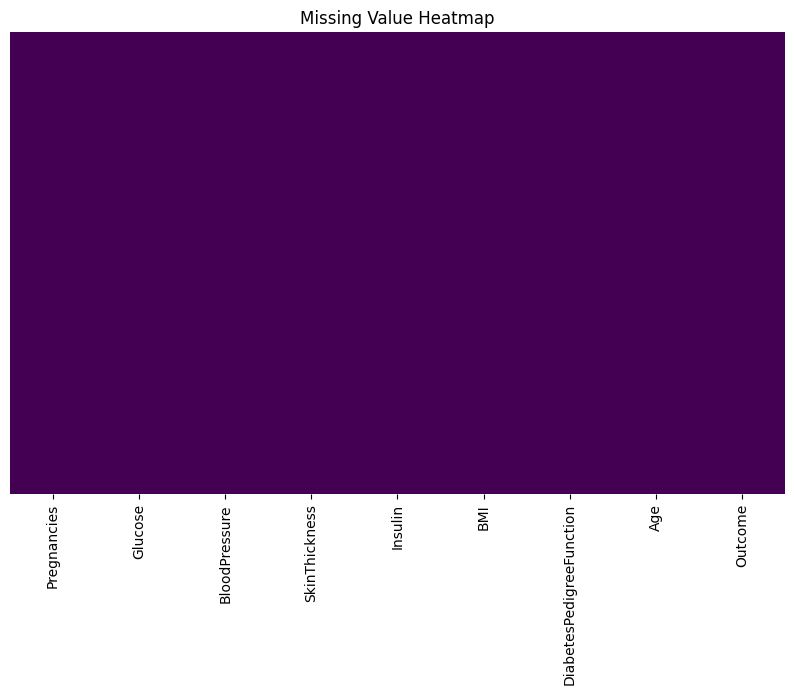

In [5]:
plt.figure(figsize=(10, 6))  # Set the size of the figure for better visualization
sns.heatmap(diabetes_dataset.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Missing Value Heatmap")
plt.show()

In [6]:
# Displaying the data types
print(diabetes_dataset.dtypes)

# Identify numeric features
numeric_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Calculate the mean
mean = diabetes_dataset[numeric_features].mean()

# Substitute 0 values with mean in the numeric columns
for feature in numeric_features:
    diabetes_dataset[feature] = diabetes_dataset[feature].replace(0, mean[feature])

# Display
features = np.array(diabetes_dataset.columns)
print(features)


Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
['Pregnancies' 'Glucose' 'BloodPressure' 'SkinThickness' 'Insulin' 'BMI'
 'DiabetesPedigreeFunction' 'Age' 'Outcome']


In [7]:
print(diabetes_dataset)

     Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0       6.000000    148.0           72.0      35.000000   79.799479  33.6   
1       1.000000     85.0           66.0      29.000000   79.799479  26.6   
2       8.000000    183.0           64.0      20.536458   79.799479  23.3   
3       1.000000     89.0           66.0      23.000000   94.000000  28.1   
4       3.845052    137.0           40.0      35.000000  168.000000  43.1   
..           ...      ...            ...            ...         ...   ...   
763    10.000000    101.0           76.0      48.000000  180.000000  32.9   
764     2.000000    122.0           70.0      27.000000   79.799479  36.8   
765     5.000000    121.0           72.0      23.000000  112.000000  26.2   
766     1.000000    126.0           60.0      20.536458   79.799479  30.1   
767     1.000000     93.0           70.0      31.000000   79.799479  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627

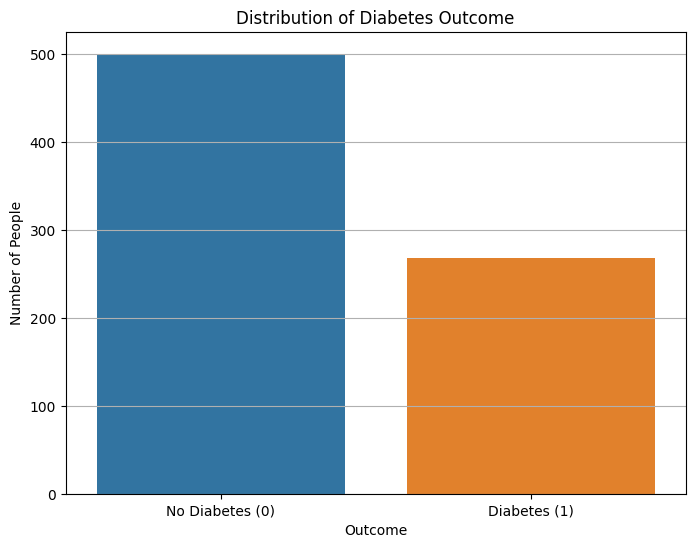

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of diabetes outcomes
plt.figure(figsize=(8, 6))
sns.countplot(x='Outcome', data=diabetes_dataset)
plt.title('Distribution of Diabetes Outcome')
plt.xlabel('Outcome')
plt.ylabel('Number of People')
plt.xticks(ticks=[0, 1], labels=['No Diabetes (0)', 'Diabetes (1)'])
plt.grid(axis='y')

plt.show()


## Test and Training Sets

In [8]:
# Find the number of rows.
total_rows = diabetes_dataset.shape[0]
train_split_index = int(total_rows * 0.85)

# Standardize the features on training set.
for feature in features[:-1]:
    feature_mean = diabetes_dataset[feature][:train_split_index].mean()
    feature_std = diabetes_dataset[feature][:train_split_index].std()
    diabetes_dataset[feature] = (diabetes_dataset[feature] - feature_mean) / feature_std

# Change the target variable from 0,1 to -1,+1 for perceptron.
diabetes_dataset[features[-1]].replace({0: -1}, inplace=True)

# Split into training and testing sets.
diabetes_train = diabetes_dataset.iloc[:train_split_index].values
diabetes_test = diabetes_dataset.iloc[train_split_index:].values

# Separate features and target variable for training and testing sets.
X_train = diabetes_train[:, :-1]
y_train = diabetes_train[:, -1]

X_test = diabetes_test[:, :-1]
y_test = diabetes_test[:, -1]


In [9]:
print(X_test.shape)
print(y_test.shape)
print(X_train.shape)
print(y_train.shape)

(116, 8)
(116,)
(652, 8)
(652,)


## Applying the Perceptron Algorithm.

$y = 1, \mbox{if} \sum_i w_i x_i >= b$

$y =  0, \mbox{otherwise}$

In [70]:
class Perceptron:
    def __init__(self):
        self.weight = None
        self.bias = None

    def activation_function(self, x):
        return 1 if np.dot(self.weight, x) >= self.bias else -1

    def predict(self, X):
        return np.array([self.activation_function(x) for x in X])

    def train(self, X, Y, epochs=1, lr=1):
        num_features = X.shape[1]
        self.weight = np.ones(num_features)
        self.bias = 0

        best_accuracy = 0
        weight_history = []

        accuracy_history = []

        for epoch in range(epochs):
            for x, y in zip(X, Y):
                y_pred = self.activation_function(x)
                if y == 1 and y_pred == -1:
                    self.weight += lr * x
                    self.bias -= lr
                elif y == -1 and y_pred == 1:
                    self.weight -= lr * x
                    self.bias += lr

            weight_history.append(self.weight)

            current_accuracy = accuracy_score(Y, self.predict(X))
            accuracy_history.append(current_accuracy)

            if current_accuracy > best_accuracy:
                best_accuracy = current_accuracy
                best_epoch = epoch
                best_weights = np.copy(self.weight)
                best_bias = self.bias

        self.weight = best_weights
        self.bias = best_bias

        print(f"Peak Accuracy: {best_accuracy} at Epoch: {best_epoch}")

        plt.plot(accuracy_history)
        plt.xlabel("Epoch")
        plt.ylabel("Accuracy")
        plt.ylim([0, 1])
        plt.show()

        return np.array(weight_history)


In [71]:
perceptron = Perceptron()


Peak Accuracy: 0.7515337423312883 at Epoch: 75


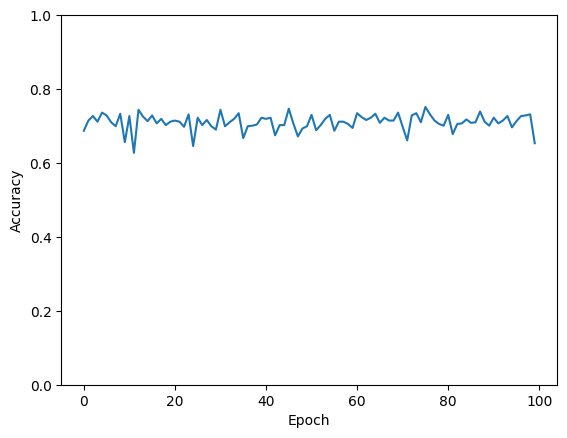

In [75]:
weights_history = perceptron.train(X_train, y_train, epochs=100, lr=0.7)


In [13]:
Y_pred_test = perceptron.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Compute performance metrics
confusion_mat = confusion_matrix(y_test, Y_pred_test)
acc = accuracy_score(y_test, Y_pred_test)
prec = precision_score(y_test, Y_pred_test)
rec = recall_score(y_test, Y_pred_test)
f1_val = f1_score(y_test, Y_pred_test)

print('Acc: {:.4f}, Prec: {:.4f}, Rec: {:.4f}, F1 Score: {:.4f}'.format(acc, prec, rec, f1_val))


Acc: 0.7500, Prec: 0.6818, Rec: 0.6667, F1 Score: 0.6742


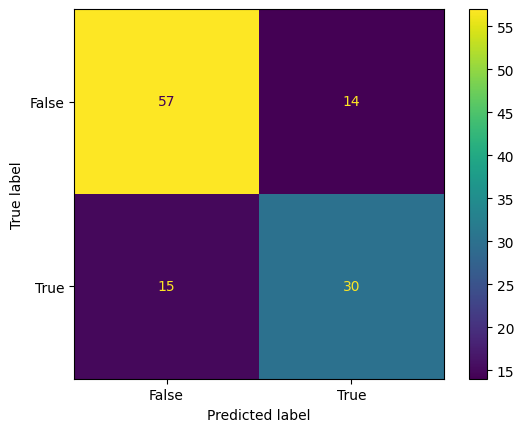

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calculate the confusion matrix
conf_mat = confusion_matrix(y_test, Y_pred_test)

# Display the confusion matrix
display_matrix = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=[False, True])
display_matrix.plot()
plt.show()


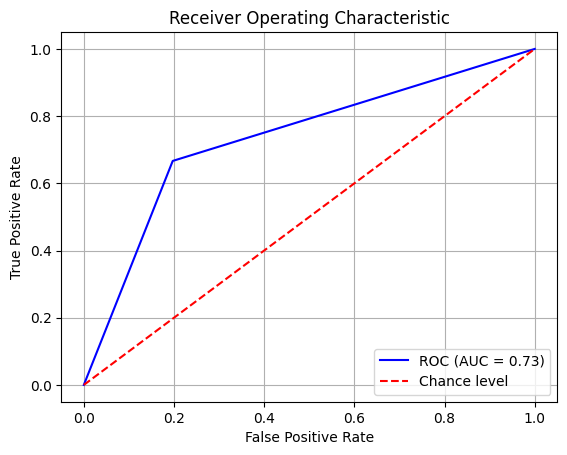

In [16]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute the ROC curve and AUC
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, Y_pred_test)
roc_auc = auc(false_positive_rate, true_positive_rate)

# Plot the ROC curve
plt.figure()
plt.plot(false_positive_rate, true_positive_rate, color='b', label='ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--', label='Chance level')
plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.legend(loc='lower right')
plt.show()


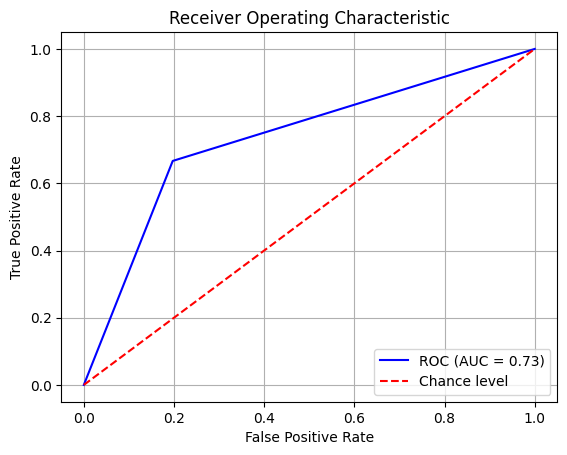

In [17]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute the ROC curve and AUC
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, Y_pred_test)
roc_auc = auc(false_positive_rate, true_positive_rate)

# Plot the ROC curve
plt.figure()
plt.plot(false_positive_rate, true_positive_rate, color='b', label='ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--', label='Chance level')
plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.legend(loc='lower right')
plt.show()
